In [6]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START,END 
import random

In [12]:
class State(TypedDict):
    name : str
    rand_list : List[int]
    counter : int
    greeting : str


def greeting(state : State) -> State:
    """ return a greeting expression"""

    state['greeting'] = "Hello "+ state['name'] + "!"
    state['counter'] = 0
    return state


def random_number_gen(state : State) -> State:
    """ Generate a random number and add it to the list"""
    
    state['rand_list'].append(random.randint(1,10))
    state['counter'] += 1
    return state


def should_continue(state: State) -> str:
    """ Check if the counter is less than 5"""
    
    if state['counter'] < 5:
        print("Hello Ouma from iteration " + str(state['counter']))
        return "continue"   
    else:
        return "end"

    
      

In [ ]:
# Start - greeting - random - random - random - random - random - end

In [13]:
graph = StateGraph(State)

graph.add_node("greeter",greeting)
graph.add_node("randomizer",random_number_gen)

graph.add_edge(START,"greeter")
graph.add_edge("greeter","randomizer") 
graph.add_conditional_edges("randomizer", # src node
                            should_continue, # action
                            {
                                "continue": "randomizer", # path 1
                                "end":END # path 2
                            })
app = graph.compile()  

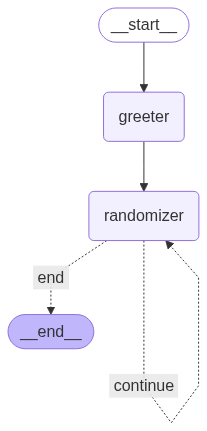

In [14]:
graph.compile()

In [15]:
app.invoke({"name" : "Oumaima", "rand_list": []})

Hello Ouma from iteration 1
Hello Ouma from iteration 2
Hello Ouma from iteration 3
Hello Ouma from iteration 4


{'name': 'Oumaima',
 'rand_list': [10, 8, 7, 7, 4],
 'counter': 5,
 'greeting': 'Hello Oumaima!'}